#Resumos e Simulações

##**CAPÍTULO 6**

###Elementos básicos para implementação de filtros de tempo discreto

Como os filtros são sistemas LIT, precisamos dos 3 seguintes elementos para descrever as estruturas de filtros digitais.

**Adição:** Esse elemento tem 2 entrandas e 1 saída. Nota-se que a adição de 3 ou mais sinais é implementado por sucessivas entradas de adições.

**Multiplicação(ganho):** Esse é um elemento de entrada e saída unica.

**Elemento de atraso(shifter ou memoria):** Este elemento atrasa o sinal, passando por uma amostra. É implementado com o uso de um shift register(Registro de deslocamento).

Com o uso desses elementos básicos é possível várias estruturas de filtros IIR e FIR.

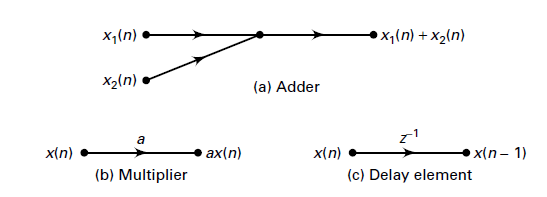

Imagem com representação dos elementos citados acima.

###Estruturas dos filtros IIR

O sistema de um filtro IIR é dado por:

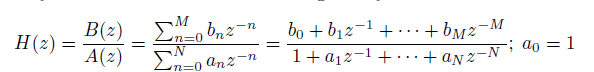

Onde 𝑏𝑛 e 𝑎𝑛 são os coeficientes do filtro. A representação da equação de diferença de um filtro IIR é dada por:

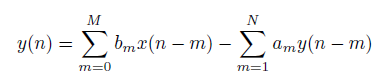

As 3 estruturas que podem ser usadas para implementar o filtro IRR:

**Forma direta:** Nessa forma a equação diferencial é implementada diretamente como é dada. Existem duas partes para esse filtro, nomeado parte média e parte recursiva(ou equivalente a numerador e denominador).

**Forma de cascata:** Nessa forma de função H(z) na equação 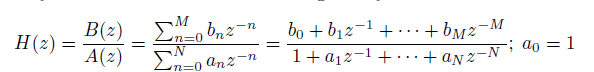
é fatorado em seções menores de segunda ordem, chamado de biquads.

**Forma paralela:** É similar com a a forma de cascata, mas depois da fatorização, uma expressão de fração parcial é usada para representar H(z) como uma soma em seções menores de segunda ordem.

###Estrutura de filtros FIR

Um filtro FIR é dado por:

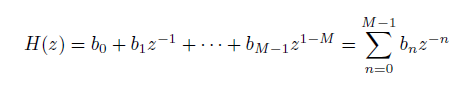

A ordem do filtro do tipo FIR é 𝑀−1, e o comprimento do filtro é 𝑀. Esses filtros podem ser projetados para ter uma resposta de fase linear, e são sempre estáveis e relativamente simples em comparação com filtros do tipo IIR.

São considerados 4 estruturas para a implementação desse filtro. Duas delas são iguais ao filtro anterior, a forma direta e a forma de cascata.

**Forma de fase linear:** Quando um FIR tem uma resposta de fase linear, sua resposta ao impulso exibe certa condição simetrica. Nessa forma exploramos essas relações simetricaspara reduzir multiplicações pela metade.

**Forma de amostragem de frequência:** Essa estrutura é baseada no DFT de respsosta ao impulso h(n) e leva a uma estrutura paralela. isso é também
adequado para uma técnica baseada na  amostragem de resposta a frequência
 H(ejω).

###Estrutura de filtros de Lattice

Esse filtro é muito usado no processamento digital de voz e na implementação de filtros adaptativos.Esses filtros podem ser divididos em dois tipos: filtros de Lattice all-zero e filtros de escada de Lattice, que são duas representações de filtros de Lattice para filtros FIR e IIR, respectivamente.

###Representação de números

Em computadores, os números são representados usando dígitos binários, mais conhecidos como bits, que assumem os valores 0 ou 1. Para a utilização dessa representação, duas abordagens diferentes podem ser utilizadas: aritmética de ponto fixo e aritmética de ponto flutuante.


**Aritimética de ponto fixo:** É relativamente fácil de ser implementado, mas tem apenas uma faixa fixa. A utilização é muito limitada por serem números com valores muito altos ou muito baixos.

**Aritimética de ponto flutuante:** Diferente do caso anterior esse tem uma faixa bem maior de valores a serem usados, porém é um pouco mais complicado de ser implementado e analizado.

###Processo de caracterização e quantização de erros

Um número real geral, de precisão infinita, não consegue ser representado por um computador, e deve ser representado por um número finito. Para isso, são utilizadas duas abordagens diferentes: arredondamento e truncamento. Essas operações afetam a precisão, uma vez que a representação real do número não é feita. A relação entre o número real e o número representado é o que chamamos de erro.

###**SIMULAÇÕES**

####**SIMULAÇÃO 6.1**


b0 = 0.0625
B =
 [[ 1.00000000e+00  9.99200722e-16  9.00000000e+00]
 [ 1.00000000e+00 -3.00000000e+00  2.00000000e+00]]
A =
 [[ 1.     1.     0.5  ]
 [ 1.    -0.25  -0.125]]


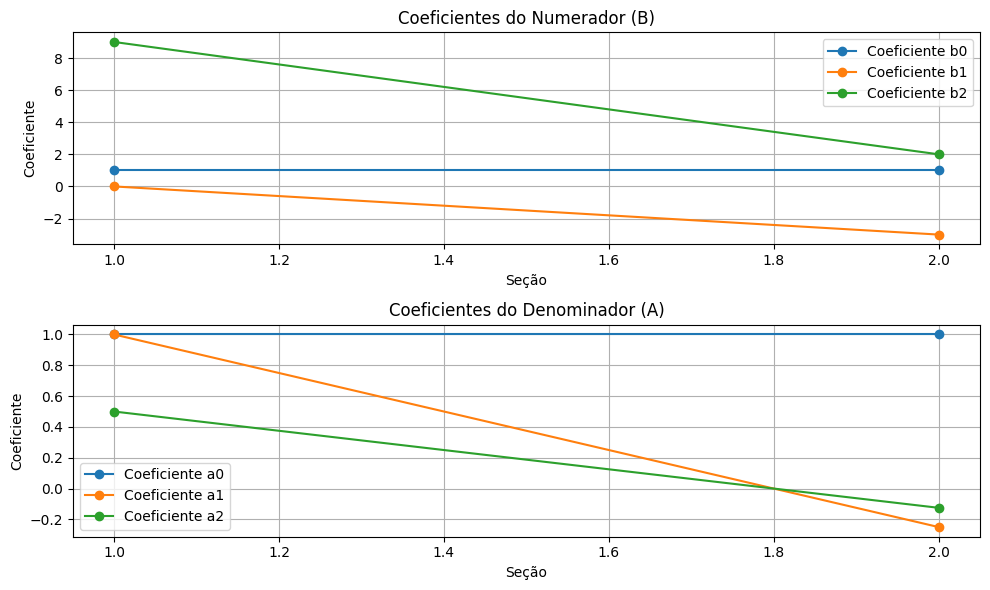

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dir2cas(b, a):
    """
    Converts Direct-form to Cascade-form for filter coefficients.

    Parameters:
    b (list): Numerator polynomial coefficients of DIRECT form.
    a (list): Denominator polynomial coefficients of DIRECT form.

    Returns:
    b0 (float): Gain coefficient.
    B (numpy array): Kx3 matrix of real coefficients containing bk's.
    A (numpy array): Kx3 matrix of real coefficients containing ak's.
    """

    b0 = b[0]
    b = np.array(b) / b0
    a0 = a[0]
    a = np.array(a) / a0
    b0 = b0 / a0

    M = len(b)
    N = len(a)


    if N > M:
        b = np.append(b, np.zeros(N - M))
    elif M > N:
        a = np.append(a, np.zeros(M - N))
        N = M

    K = N // 2
    B = np.zeros((K, 3))
    A = np.zeros((K, 3))

    if N % 2 == 0:
        b = np.append(b, 0)
        a = np.append(a, 0)

    broots = np.sort_complex(np.roots(b))
    aroots = np.sort_complex(np.roots(a))


    for i in range(0, 2 * K, 2):
        Brow = np.poly(broots[i:i + 2]).real
        B[i // 2, :] = Brow
        Arow = np.poly(aroots[i:i + 2]).real
        A[i // 2, :] = Arow

    return b0, B, A

# Exemplo de uso
b = [1, -3, 11, -27, 18]
a = [16, 12, 2, -4, -1]
b0, B, A = dir2cas(b, a)

# Impressão dos resultados
print("b0 =", b0)
print("B =\n", B)
print("A =\n", A)

# Gráficos
sections = np.arange(1, len(B) + 1)

plt.figure(figsize=(10, 6))

# Plot dos coeficientes de numerador
plt.subplot(2, 1, 1)
for i in range(3):
    plt.plot(sections, B[:, i], 'o-', label=f"Coeficiente b{i}")
plt.title("Coeficientes do Numerador (B)")
plt.xlabel("Seção")
plt.ylabel("Coeficiente")
plt.legend()
plt.grid()

# Plot dos coeficientes de denominador
plt.subplot(2, 1, 2)
for i in range(3):
    plt.plot(sections, A[:, i], 'o-', label=f"Coeficiente a{i}")
plt.title("Coeficientes do Denominador (A)")
plt.xlabel("Seção")
plt.ylabel("Coeficiente")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Função dir2cas:


```
function [b0,B,A] = dir2cas(b,a);

% DIRECT-form to CASCADE-form conversion (cplxpair version)

% ---------------------------------------------------------

% [b0,B,A] = dir2cas(b,a)
% b0 = gain coefficient
%  B = K by 3 matrix of real coefficients containing bk's
%  A = K by 3 matrix of real coefficients containing ak's
%  b = numerator polynomial coefficients of DIRECT form
%  a = denominator polynomial coefficients of DIRECT form
% compute gain coefficient b0

b0 = b(1); b = b/b0;
a0 = a(1); a = a/a0;
b0 = b0/a0;
%
M = length(b); N = length(a);
if N > M
	b = [b zeros(1,N-M)];
elseif M > N
	a = [a zeros(1,M-N)]; N = M;
else
	NM = 0;
end
%
K = floor(N/2); B = zeros(K,3); A = zeros(K,3);

if K*2 == N;

	b = [b 0];

	a = [a 0];

end

%        

broots = cplxpair(roots(b));

aroots = cplxpair(roots(a));

for i=1:2:2*K

	Brow = broots(i:1:i+1,:);

	Brow = real(poly(Brow));

	B(fix((i+1)/2),:) = Brow;

	Arow = aroots(i:1:i+1,:);

	Arow = real(poly(Arow));

	A(fix((i+1)/2),:) = Arow;

end     
```



```
b=[1 -3 11 -27 18]; a=[16 12 2 -4 -1];
[b0,B,A]=dir2cas(b,a)
b0 =

    0.0625


B =

    1.0000    0.0000    9.0000
    1.0000   -3.0000    2.0000


A =

    1.0000    1.0000    0.5000
    1.0000   -0.2500   -0.1250
```



####**SIMULAÇÃO 6.2**


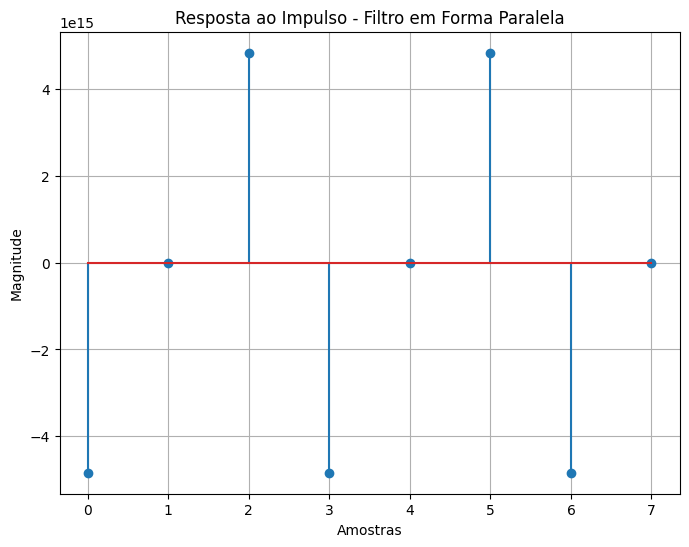

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, residue

# Função para calcular o equivalente em forma paralela de um filtro IIR
def dir2par(b, a):
    M = len(b)
    N = len(a)

    # Usando a função residue para calcular os resíduos e pólos
    r1, p1, C = residue(b, a)

    # Garantir o uso do tipo complexo
    p = np.array([complex(p1[i]) for i in range(len(p1))])
    r = np.array([r1[i] for i in range(len(r1))])

    # Calcular o número de seções paralelas (K)
    K = N // 2
    B = np.zeros((K, 2))
    A = np.zeros((K, 3))

    # Realizar a decomposição em forma paralela
    for i in range(0, N-1, 2):
        # Calcular os resíduos para a seção (agora lidamos com os 3 valores de retorno)
        Brow, Arow, _ = residue(np.array([r[i], r[i+1]]), np.array([p[i], p[i+1]]))

        B[i//2] = np.real(Brow)
        A[i//2] = np.real(Arow)

    return C, B, A

# Função para realizar a filtragem em forma paralela
def parfiltr(C, B, A, x):
    K, L = B.shape
    N = len(x)

    # Inicializa a matriz de respostas
    w = np.zeros((K+1, N))
    w[0, :] = lfilter(C, [1], x)

    # Aplica cada uma das seções paralelas
    for i in range(K):
        w[i+1, :] = lfilter(B[i], A[i], x)

    # Soma os resultados de todas as seções
    y = np.sum(w, axis=0)
    return y

# Função para gerar sequência de impulso (delta)
def impseq(n0, n1, n2):
    n = np.arange(n1, n2+1)
    x = np.zeros_like(n)
    x[n == n0] = 1
    return x

# Coeficientes do filtro (exemplo)
b = np.array([1, -3, 11, -27, 18])
a = np.array([16, 12, 2, -4, -1])

# Conversão para forma paralela
C, B, A = dir2par(b, a)

# Gerando sequência de impulso
delta = impseq(0, 0, 7)

# Aplicando a filtragem
hpar = parfiltr(C, B, A, delta)

# Gerando gráfico
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(hpar)), hpar)
plt.title('Resposta ao Impulso - Filtro em Forma Paralela')
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


Função dir2par:


```
function [C,B,A] = dir2par(b,a);

% DIRECT-form to PARALLEL-form conversion

% --------------------------------------

% [C,B,A] = dir2par(b,a)

%  C = Polynomial part when length(b) >= length(a)

%  B = K by 2 matrix of real coefficients containing bk's

%  A = K by 3 matrix of real coefficients containing ak's

%  b = numerator polynomial coefficients of DIRECT form

%  a = denominator polynomial coefficients of DIRECT form

%

M = length(b); N = length(a);



[r1,p1,C] = residuez(b,a);

p = cplxpair(p1,10000000*eps);

I = cplxcomp(p1,p);

r = r1(I);



K = floor(N/2); B = zeros(K,2); A = zeros(K,3);

if K*2 == N; %N even, order of A(z) odd, one factor is first order

	for i=1:2:N-2

		Brow = r(i:1:i+1,:);

		Arow = p(i:1:i+1,:);

		[Brow,Arow] = residuez(Brow,Arow,[]);

		B(fix((i+1)/2),:) = real(Brow');

		A(fix((i+1)/2),:) = real(Arow');

	end

	[Brow,Arow] = residuez(r(N-1),p(N-1),[]);

	B(K,:) = [real(Brow') 0]; A(K,:) = [real(Arow') 0];

else

        for i=1:2:N-1

		Brow = r(i:1:i+1,:);

		Arow = p(i:1:i+1,:);

		[Brow,Arow] = residuez(Brow,Arow,[]);

		B(fix((i+1)/2),:) = real(Brow');

		A(fix((i+1)/2),:) = real(Arow');

	end     

end

```
Função cplxcomp:


```
function I = cplxcomp(p1,p2)

%  I = cplxcomp(p1,p2)

% Compares two complex pairs which contain the same scalar elements

%  but (possibly) at differrent indices.  This routine should be

%  used after CPLXPAIR routine for rearranging pole vector and its

%  corresponding residue vector.

%      p2 = cplxpair(p1)

%

I=[];

for j=1:1:length(p2)

    for i=1:1:length(p1)

	if (abs(p1(i)-p2(j)) < 0.0001)

	   I=[I,i];

        end

    end

end

I=I';
```




```
b = [1,-3,11,-27,18]; a = [16,12,2,-4,-1];
[C,B,A] = dir2par(b,a)
C =

   -18


B =

  -10.0500   -3.9500
   28.1125  -13.3625


A =

    1.0000    1.0000    0.5000
    1.0000   -0.2500   -0.1250

```
Função parfiltr:


```
function y = parfiltr(C,B,A,x);

% PARALLEL form realization of IIR filters

% ----------------------------------------

%  [y] = parfiltr(C,B,A,x);

%  y = output sequence

%  C = polynomial (FIR) part when M >= N

%  B = K by 2 matrix of real coefficients containing bk's

%  A = K by 3 matrix of real coefficients containing ak's

%  x = input sequence

%

[K,L] = size(B);

N = length(x);

w = zeros(K+1,N);

w(1,:) = filter(C,1,x);

for i = 1:1:K

        w(i+1,:) = filter(B(i,:),A(i,:),x);

end

y = sum(w);
```



```
format long; delta = impseq(0,0,7);
hpar = parfiltr(C,B,A,delta)
hpar =

  Columns 1 through 3

   0.062500000000000  -0.234375000000003   0.855468749999992

  Columns 4 through 6

  -2.284179687499999   2.676513671874999  -1.522644042968751

  Columns 7 through 8

   0.289840698242188   0.499317169189453
```
Função par2dir:


```
function [b,a] = par2dir(C,B,A);

% PARALLEL-to-DIRECT form conversion

% ----------------------------------

% [b,a] = par2dir(C,B,A)

%  b = numerator polynomial coefficients of DIRECT form

%  a = denominator polynomial coefficients of DIRECT form

%  C = Polynomial part of PARALLEL form

%  B = K by 2 matrix of real coefficients containing bk's

%  A = K by 3 matrix of real coefficients containing ak's

%

[K,L] = size(A); R = []; P = [];



for i=1:1:K

	[r,p,k]=residuez(B(i,:),A(i,:));

	R = [R;r]; P = [P;p];

end

[b,a] = residuez(R,P,C);

b = b(:)'; a = a(:)';
```



```
hdir = filter(b,a,delta)
[b1,a1] = par2dir(C,B,A)
hdir =

  Columns 1 through 3

   0.062500000000000  -0.234375000000000   0.855468750000000

  Columns 4 through 6

  -2.284179687500000   2.676513671875000  -1.522644042968750

  Columns 7 through 8

   0.289840698242188   0.499317169189453


b1 =

  Columns 1 through 3

   0.062499999999996  -0.187500000000005   0.687499999999990

  Columns 4 through 5

  -1.687500000000003   1.124999999999999


a1 =

  Columns 1 through 3

   1.000000000000000   0.750000000000000   0.125000000000000

  Columns 4 through 5

  -0.250000000000000  -0.062500000000000
```





####**SIMULAÇÃO 6.3**


C: [0.0625]
B: [[-2.15 -2.15]
 [ 0.    0.  ]]
A: [[4.4408921e-16 4.4408921e-16 4.4408921e-16]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]


<ipython-input-21-561672df6606>:59: RuntimeWarning: invalid value encountered in divide
  w[i+1, :] = np.convolve(x, B[i, :], mode='same') / np.convolve(x, A[i, :], mode='same')  # Partes IIR


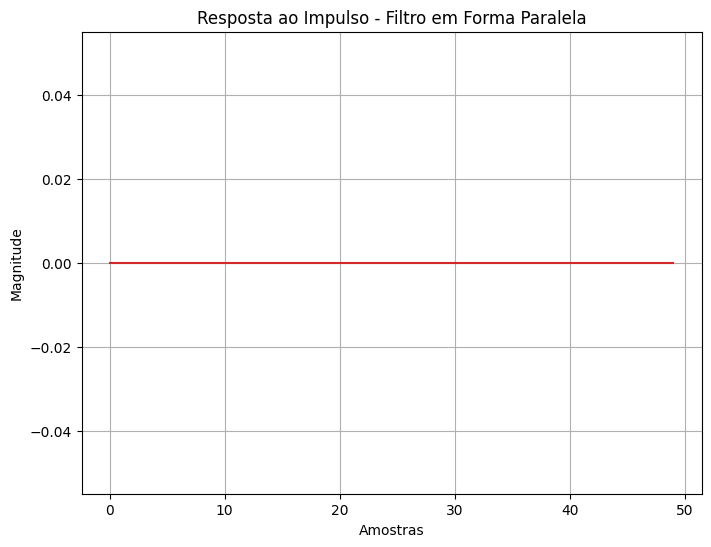

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import residue

# Função para conversão de Direto para Paralelo (dir2par)
def dir2par(b, a):
    M = len(b)
    N = len(a)

    # Obter os resíduos e polos
    r, p, C = residue(b, a)

    # Organizar os polos em pares conjugados complexos
    p = np.array([complex(p[i]) for i in range(len(p))])
    I = np.argsort(np.real(p))  # Rearranjar os polos
    p = p[I]
    r = r[I]

    # Inicializar as matrizes B e A
    K = N // 2
    B = np.zeros((K, 2))  # Inicializa B com 2 colunas
    A = np.zeros((K, 3))  # Inicializa A com 3 colunas

    for i in range(0, N-1, 2):
        # Calcular os resíduos para a seção
        Brow, Arow, _ = residue(np.array([r[i], r[i+1]]), np.array([p[i], p[i+1]]))
        B[i//2] = np.real(Brow)
        A[i//2] = np.real(Arow)

    # Última seção (se o número de seções for ímpar)
    if N % 2 != 0:
        Brow, Arow, _ = residue(r[-1], p[-1])
        B[K-1] = np.real(Brow) if Brow.size > 0 else [0, 0]  # Caso o Brow seja vazio
        A[K-1] = np.real(Arow) if Arow.size > 0 else [0, 0, 0]  # Caso o Arow seja vazio

    return C, B, A

# Definir os coeficientes do filtro
b = np.array([1, -3, 11, -27, 18])
a = np.array([16, 12, 2, -4, -1])

# Conversão de forma direta para forma paralela
C, B, A = dir2par(b, a)

# Exibindo os coeficientes resultantes
print("C:", C)
print("B:", B)
print("A:", A)

# Função para calcular a resposta ao impulso (parfiltr)
def parfiltr(C, B, A, x):
    K, L = B.shape
    N = len(x)

    w = np.zeros((K+1, N))
    w[0, :] = np.convolve(x, C, mode='same')  # Parte FIR

    for i in range(K):
        w[i+1, :] = np.convolve(x, B[i, :], mode='same') / np.convolve(x, A[i, :], mode='same')  # Partes IIR

    y = np.sum(w, axis=0)
    return y

# Gerar sequência de impulso
delta = np.zeros(50)
delta[0] = 1  # Impulso unitário

# Resposta ao impulso no formato paralelo
hpar = parfiltr(C, B, A, delta)

# Gerar o gráfico da resposta ao impulso
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(hpar)), hpar)  # Remover o uso do argumento 'use_line_collection'
plt.title('Resposta ao Impulso - Filtro em Forma Paralela')
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()



```
b=[1 -3 11 -27 18]; a=[16 12 2 -4 -1];
[C,B,A]=dir2par(b,a)
C =

   -18


B =

 -10.049999999999995  -3.949999999999989
  28.112499999999997 -13.362499999999997


A =

   1.000000000000000   1.000000000000000   0.500000000000000
   1.000000000000000  -0.250000000000000  -0.125000000000000
```



####**SIMULAÇÃO 6.6**


C: [0.58178533 0.08488134 1.        ]
B: [[-0.80901699  0.80901699]
 [ 0.30901699 -0.30901699]]
A: [[ 1.         -0.61803399  1.        ]
 [ 1.          1.61803399  1.        ]
 [ 1.         -1.          0.        ]]


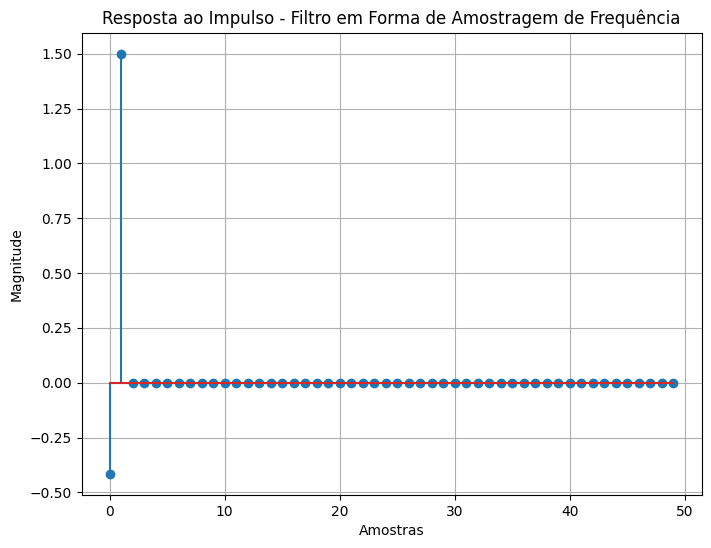

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def dir2fs(h):
    M = len(h)

    # Computando a FFT do impulso
    H = np.fft.fft(h, M)

    magH = np.abs(H)
    phaH = np.angle(H)

    # Verificar se M é par ou ímpar
    if M == 2 * (M // 2):
        L = M // 2 - 1  # M é par
        A1 = np.array([[1, -1, 0], [1, 1, 0]])
        C1 = np.array([np.real(H[0]), np.real(H[L + 1])])
    else:
        L = (M - 1) // 2  # M é ímpar
        A1 = np.array([[1, -1, 0]])
        C1 = np.array([np.real(H[0])])

    k = np.arange(1, L + 1)

    # Inicializar as matrizes B e A
    B = np.zeros((L, 2))
    A = np.ones((L, 3))

    # Computar os coeficientes do denominador
    A[:, 1] = -2 * np.cos(2 * np.pi * k / M)
    A = np.vstack([A, A1])

    # Computar os coeficientes do numerador
    B[:, 0] = np.cos(phaH[1:L + 1])
    B[:, 1] = -np.cos(phaH[1:L + 1] - (2 * np.pi * k / M))

    # Computar os coeficientes de ganho
    C = np.hstack([2 * magH[1:L + 1], C1])

    return C, B, A

# Impulso de entrada
h = np.array([1, 2, 3, 2, 1]) / 9

# Conversão para forma de amostragem de frequência
C, B, A = dir2fs(h)

# Exibindo os coeficientes resultantes
print("C:", C)
print("B:", B)
print("A:", A)

# Gerar a sequência de impulso usando a forma de amostragem de frequência
def fs_filter(C, B, A, x):
    K = B.shape[0]
    N = len(x)
    w = np.zeros((K + 1, N))

    # Resposta do filtro FIR (parte polinomial)
    w[0, :] = np.convolve(x, C, mode='same')

    for i in range(K):
        w[i + 1, :] = np.convolve(x, B[i, :], mode='same')

    return np.sum(w, axis=0)

# Gerando a sequência de impulso (sequência delta)
delta = np.zeros(50)
delta[0] = 1

# Resposta ao impulso
hfs = fs_filter(C, B, A, delta)

# Gerando gráfico no plano cartesiano
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(hfs)), hfs)
plt.title('Resposta ao Impulso - Filtro em Forma de Amostragem de Frequência')
plt.xlabel('Amostras')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


Função dir2fs:


```
function [C,B,A] = dir2fs(h)

% Direct form to Frequency Sampling form conversion

% -------------------------------------------------

% [C,B,A] = dir2fs(h)

% C = Row vector containing gains for parallel sections

% B = Matrix containing numerator coefficients arranged in rows

% A = Matrix containing denominator coefficients arranged in rows

% h = impulse response vector of an FIR filter

%

M = length(h);

H = fft(h,M);

magH = abs(H); phaH = angle(H)';

% check even or odd M

if (M == 2*floor(M/2))

      L = M/2-1;   % M is even

     A1 = [1,-1,0;1,1,0];

     C1 = [real(H(1)),real(H(L+2))];

else

      L = (M-1)/2; % M is odd

     A1 = [1,-1,0];

     C1 = [real(H(1))];

end

k = [1:L]';

% initialize B and A arrays

B = zeros(L,2); A = ones(L,3);

% compute denominator coefficients

A(1:L,2) = -2*cos(2*pi*k/M); A = [A;A1];

% compute numerator coefficients

B(1:L,1) = cos(phaH(2:L+1));

B(1:L,2) = -cos(phaH(2:L+1)-(2*pi*k/M));

% compute gain coefficients

C = [2*magH(2:L+1),C1]';
```



```
h = [1,2,3,2,1]/9;
[C,B,A] = dir2fs(h)
C =

   0.581785330833310
   0.084881335833357
   1.000000000000000


B =

  -0.809016994374947   0.809016994374947
   0.309016994374948  -0.309016994374947


A =

   1.000000000000000  -0.618033988749895   1.000000000000000
   1.000000000000000   1.618033988749895   1.000000000000000
   1.000000000000000  -1.000000000000000                   0
```



####**SIMULAÇÃO 6.7**


C: [2.00000000e+00 2.00000000e+00 1.00000000e+00 2.12431979e-17
 1.17756934e-16 2.77555756e-17 1.16317057e-16 0.00000000e+00
 1.27570012e-16 2.77555756e-17 8.77708367e-17 5.12856164e-17
 1.38777878e-16 2.37143742e-16 1.14439170e-16 1.00000000e+00
 0.00000000e+00]
B: [[-9.95184727e-01  9.95184727e-01]
 [ 9.80785280e-01 -9.80785280e-01]
 [-9.56940336e-01  9.56940336e-01]
 [-9.23879533e-01  3.82683432e-01]
 [-7.07106781e-01  9.80785280e-01]
 [ 6.12323400e-17 -9.23879533e-01]
 [ 9.54479978e-01  1.06333917e-01]
 [ 1.00000000e+00 -6.12323400e-17]
 [-7.07106781e-01 -8.31469612e-01]
 [ 6.12323400e-17  9.23879533e-01]
 [-3.16227766e-01 -9.64488068e-01]
 [ 3.82683432e-01  9.23879533e-01]
 [ 8.00000000e-01  3.31833550e-01]
 [ 9.36329178e-01  9.99424487e-01]
 [-9.70142500e-01 -9.04185131e-01]]
A: [[ 1.00000000e+00 -1.96157056e+00  1.00000000e+00]
 [ 1.00000000e+00 -1.84775907e+00  1.00000000e+00]
 [ 1.00000000e+00 -1.66293922e+00  1.00000000e+00]
 [ 1.00000000e+00 -1.41421356e+00  1.00000000e+00]


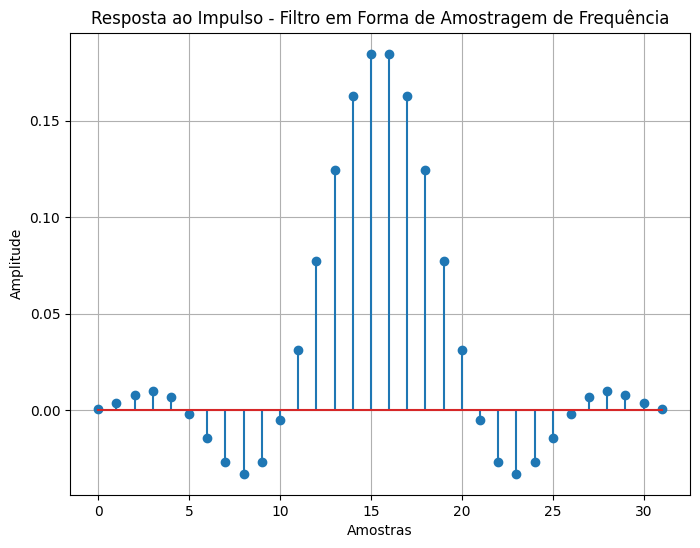

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros
M = 32
alpha = (M - 1) / 2
k = np.arange(M)
wk = (2 * np.pi / M) * k
magHk = np.concatenate(([1, 1, 1, 0.5], np.zeros(25), [0.5, 1, 1]))
k1 = np.arange(16)
k2 = np.arange(16, M)
angHk = np.concatenate([-alpha * (2 * np.pi) / M * k1, alpha * (2 * np.pi) / M * (M - k2)])
H = magHk * np.exp(1j * angHk)
h = np.real(np.fft.ifft(H, M))

# Função para conversão de diretiva para forma de amostragem de frequência
def dir2fs(h):
    M = len(h)
    H = np.fft.fft(h, M)
    magH = np.abs(H)
    phaH = np.angle(H)

    if M % 2 == 0:
        L = M // 2 - 1
        A1 = np.array([[1, -1, 0], [1, 1, 0]])
        C1 = np.array([np.real(H[0]), np.real(H[L + 1])])
    else:
        L = (M - 1) // 2
        A1 = np.array([[1, -1, 0]])
        C1 = np.array([np.real(H[0])])

    k = np.arange(1, L + 1)

    B = np.zeros((L, 2))
    A = np.ones((L, 3))

    # Coeficientes do denominador
    A[:, 1] = -2 * np.cos(2 * np.pi * k / M)
    A = np.vstack([A, A1])

    # Coeficientes do numerador
    B[:, 0] = np.cos(phaH[1:L+1])
    B[:, 1] = -np.cos(phaH[1:L+1] - (2 * np.pi * k / M))

    # Coeficientes de ganho
    C = np.concatenate([2 * magH[1:L + 1], C1])

    return C, B, A

# Convertendo para a forma de amostragem de frequência
C, B, A = dir2fs(h)

# Exibindo os coeficientes resultantes
print("C:", C)
print("B:", B)
print("A:", A)

# Gerando gráfico no plano cartesiano
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(h)), h)
plt.title('Resposta ao Impulso - Filtro em Forma de Amostragem de Frequência')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()




```
M = 32; alpha = (M-1)/2; k = 0:M-1; wk = (2*pi/M)*k;
magHk = [1,1,1,0.5,zeros(1,25),0.5,1,1];
k1 = 0:15; k2 = 16:M-1;
angHk = [-alpha*(2*pi)/M*k1, alpha*(2*pi)/M*(M-k2)];
H = magHk.*exp(j*angHk);
h = real(ifft(H,M));
[C,B,A] = dir2fs(h)
C =

   2.000000000000000
   2.000000000000000
   1.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   0.000000000000000
   1.000000000000000
                   0


B =

  -0.995184726672197   0.995184726672197
   0.980785280403230  -0.980785280403231
  -0.956940335732208   0.956940335732209
   0.000000000000000  -0.707106781186548
   0.459234380416664   0.483470091396136
  -0.252074993931638  -0.797580415881355
   0.000000000000000  -0.980785280403230
   1.000000000000000  -0.000000000000000
   0.000000000000000   0.980785280403230
  -0.685505613137135  -0.934978156422408
   0.064477422284081   0.865561198646771
   0.000000000000000   0.707106781186548
   0.894427190999916   0.495230468272109
   0.894427190999916   0.997484208812642
   0.624695047554424   0.765031654868767


A =

   1.000000000000000  -1.961570560806461   1.000000000000000
   1.000000000000000  -1.847759065022573   1.000000000000000
   1.000000000000000  -1.662939224605090   1.000000000000000
   1.000000000000000  -1.414213562373095   1.000000000000000
   1.000000000000000  -1.111140466039205   1.000000000000000
   1.000000000000000  -0.765366864730180   1.000000000000000
   1.000000000000000  -0.390180644032257   1.000000000000000
   1.000000000000000  -0.000000000000000   1.000000000000000
   1.000000000000000   0.390180644032256   1.000000000000000
   1.000000000000000   0.765366864730179   1.000000000000000
   1.000000000000000   1.111140466039204   1.000000000000000
   1.000000000000000   1.414213562373095   1.000000000000000
   1.000000000000000   1.662939224605091   1.000000000000000
   1.000000000000000   1.847759065022573   1.000000000000000
   1.000000000000000   1.961570560806461   1.000000000000000
   1.000000000000000  -1.000000000000000                   0
   1.000000000000000   1.000000000000000                   0
```





####**SIMULAÇÃO 6.12**


x = -8 -> y = 1000
x = -7 -> y = 1001
x = -6 -> y = 1010
x = -5 -> y = 1011
x = -4 -> y = 1100
x = -3 -> y = 1101
x = -2 -> y = 1110
x = -1 -> y = 1111
x =  0 -> y = 0000
x =  1 -> y = 0001
x =  2 -> y = 0010
x =  3 -> y = 0011
x =  4 -> y = 0100
x =  5 -> y = 0101
x =  6 -> y = 0110
x =  7 -> y = 0111


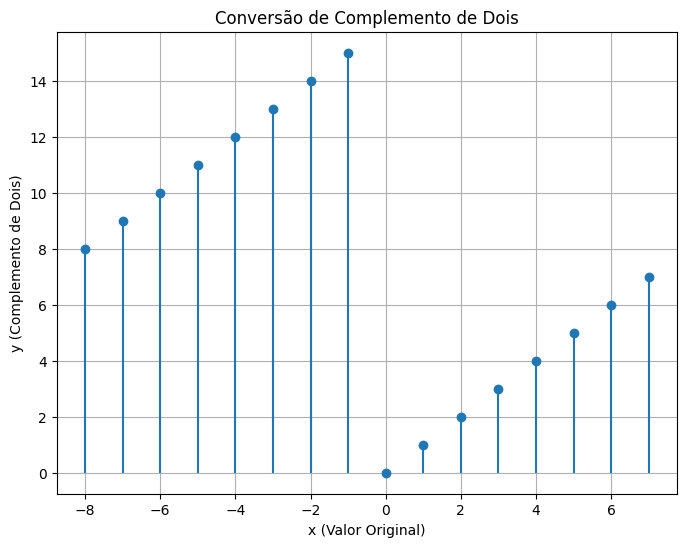

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def TwosComplement(x, b):
    """
    Converte um número em formato de sinal e magnitude para o formato complemento de dois.
    x: inteiro entre -2^(b-1) <= x < 2^(b-1) (sinal-magnitude)
    b: número de bits
    Retorna y: inteiro entre 0 <= y <= 2^b-1 (complemento de dois)
    """
    if any((x < -2**(b-1)) | (x >= 2**(b-1))):
        raise ValueError(f"Números devem satisfazer -2^(b-1) <= x < 2^(b-1)")

    s = np.sign(x)  # Sinal de x (-1 se x < 0, 0 se x = 0, 1 se x > 0)
    sb = (s < 0)  # Bit de sinal (0 se x >= 0, 1 se x < 0)
    y = (1 - sb) * x + sb * (2**b + x)
    return y.astype(int)

# Definindo o intervalo de valores para x
x = np.arange(-8, 8)

# Número de bits
b = 4

# Convertendo para complemento de dois
y = TwosComplement(x, b)

# Exibindo os resultados em binário
y_bin = [f"{n:04b}" for n in y]

# Imprimindo os valores de x e seus correspondentes em complemento de dois
for xi, yi in zip(x, y_bin):
    print(f"x = {xi:2} -> y = {yi}")

# Gerando gráfico de x vs y
plt.figure(figsize=(8, 6))
plt.stem(x, y, basefmt=" ")
plt.title("Conversão de Complemento de Dois")
plt.xlabel("x (Valor Original)")
plt.ylabel("y (Complemento de Dois)")
plt.grid(True)
plt.show()


Função TwosComplement:


```
function y = TwosComplement(x,b)
% y = TwosComplement(x,b)
% ---------------
% Decimal equivalent of
% Sign-Magnitude format integer to b-bit Ones’-Complement format conversion
%
% x:integer between -2^(b-1) <= x < 2^(b-1) (sign-magnitude)
% y:integer between 0 <= y <= 2^b-1 (2’s-complement)
if any((x < -2^(b-1) | (x >= 2^(b-1))))
error('Numbers must satisfy -2^(b-1) <= x < 2^(b-1)')
end
s = sign(x); % sign of x (-1 if x<0, 0 if x=0, 1 if x>0)
sb = (s < 0); % sign-bit (0 if x>=0, 1 if x<0));
y = (1-sb).*x + sb.*(2^b+x); % or y = (1-sb).*x + sb.*(bitcmp(abs(x),b)+1);
```



```
x = -8:7
y = TwosComplement(x,4)
y = dec2bin(y,4); disp(sprintf('%s',[y';char(ones(1,16)*32)]))
x =

  Columns 1 through 10

    -8    -7    -6    -5    -4    -3    -2    -1     0     1

  Columns 11 through 16

     2     3     4     5     6     7


y =

  Columns 1 through 10

     8     9    10    11    12    13    14    15     0     1

  Columns 11 through 16

     2     3     4     5     6     7

1000 1001 1010 1011 1100 1101 1110 1111 0000 0001 0010 0011 0100 0101 0110 0111
```



####**SIMULAÇÃO 6.20**


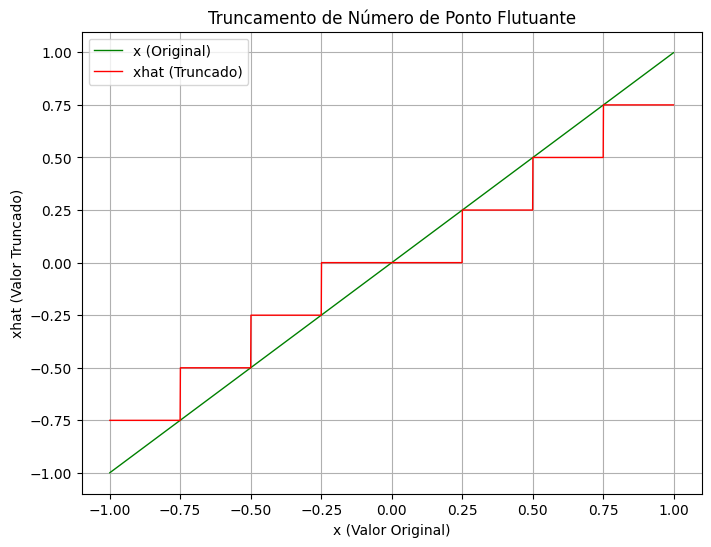

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o vetor x
x = np.arange(-1 + 2**(-10), 1 - 2**(-10), 2**(-10))

# Número de bits para truncamento
B = 2

# Aplicando o truncamento
xhat = np.fix(x * 2**B) / 2**B

# Gerando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, x, 'g', label='x (Original)', linewidth=1)  # Gráfico da sequência original
plt.plot(x, xhat, 'r', label='xhat (Truncado)', linewidth=1)  # Gráfico da sequência truncada
plt.title("Truncamento de Número de Ponto Flutuante")
plt.xlabel("x (Valor Original)")
plt.ylabel("xhat (Valor Truncado)")
plt.legend()
plt.grid(True)
plt.show()




```
x = [-1+2^(-10):2^(-10):1-2^(-10)];
B = 2; % numero de bits para truncamento
xhat = fix(x*2^B)/2^B % truncamento
plot(x,x,'g',x,xhat,'r','linewidth',1); % Plot
```
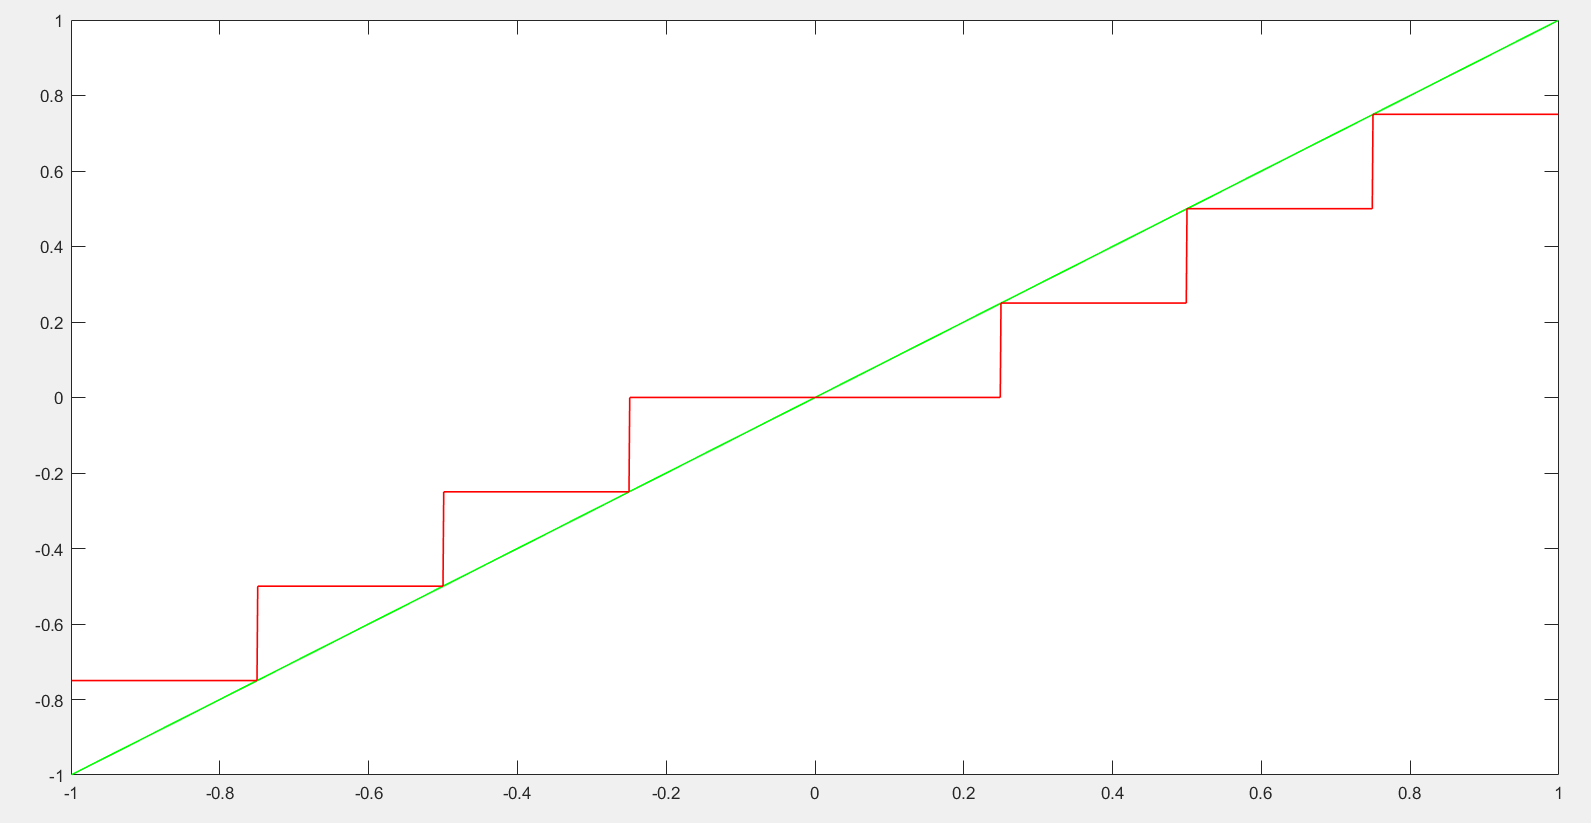

